In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV

### Load Data

In [6]:
titanic = pd.read_csv(r'D:\Rishabh\coding\machine learning\TitanicSurvival\train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Quick look over the Data

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Adjusting outliers 

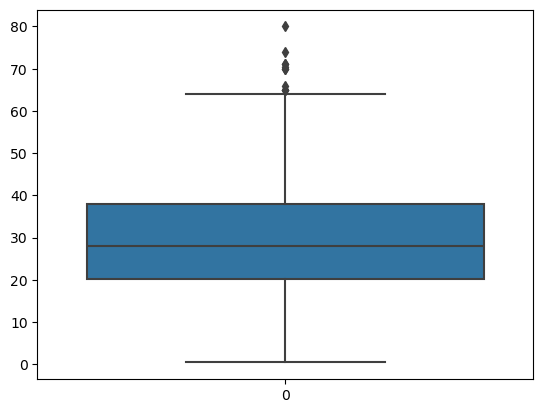

In [10]:
sns.boxplot(titanic['Age'])
plt.show()

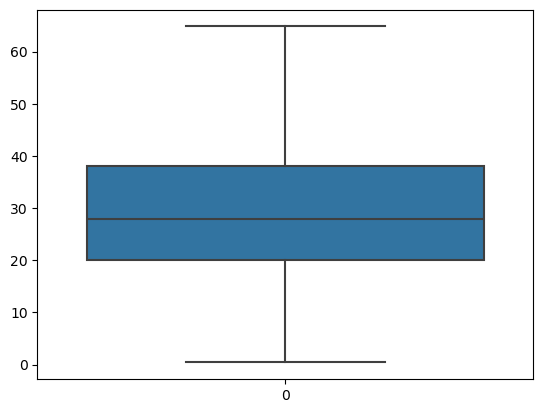

In [11]:
q1=titanic["Age"].quantile(0.25)
q3=titanic["Age"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

titanic.loc[titanic["Age"]>ul, "Age"]=ul

sns.boxplot(titanic['Age'])
plt.show()

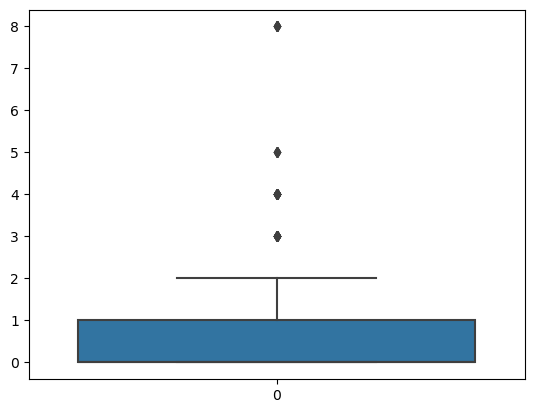

In [12]:
sns.boxplot(titanic['SibSp'])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4128\4002772829.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic.loc[titanic["SibSp"]>ul, "SibSp"]=ul


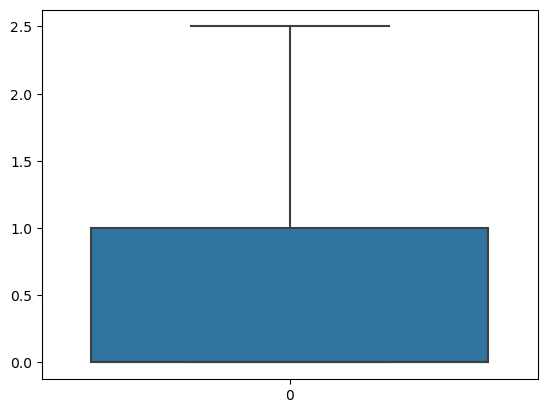

In [13]:
q1=titanic["SibSp"].quantile(0.25)
q3=titanic["SibSp"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

titanic.loc[titanic["SibSp"]>ul, "SibSp"]=ul

sns.boxplot(titanic['SibSp'])
plt.show()

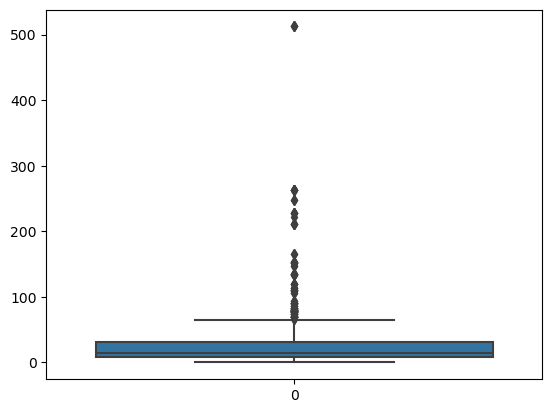

In [15]:
sns.boxplot(titanic['Fare'])
plt.show()

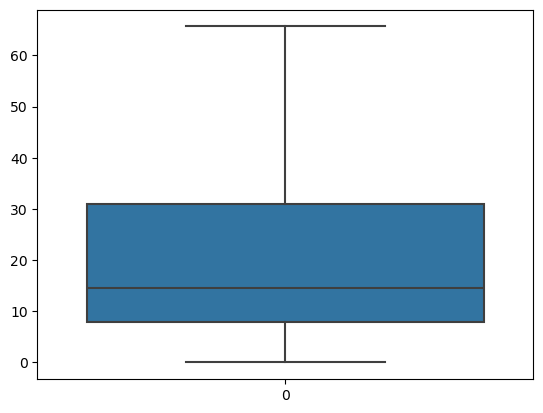

In [16]:
q1=titanic["Fare"].quantile(0.25)
q3=titanic["Fare"].quantile(0.75)

iqr=q3-q1

ul=q3+1.5*iqr

titanic.loc[titanic["Fare"]>ul, "Fare"]=ul

sns.boxplot(titanic['Fare'])
plt.show()

### Imputing values

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [56]:
imputer_num = SimpleImputer(strategy='median')

titanic_numeric = titanic.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived'], axis=1)
titanic_survived = titanic['Survived']
X = imputer_num.fit_transform(titanic_numeric)


In [57]:
titanic_numeric_tr = pd.DataFrame(X, columns=titanic_numeric.columns)
titanic_numeric_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Pclass       891 non-null    float64
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    float64
 4   Parch        891 non-null    float64
 5   Fare         891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


### scaling num values

In [63]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(titanic_numeric_tr)

In [65]:
titanic_numeric_scaled = pd.DataFrame(scaled_data, columns=titanic_numeric_tr.columns)
titanic_numeric_scaled

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,-0.569300,0.810220,-0.473674,-0.820552
1,-1.726220,-1.566107,0.678422,0.810220,-0.473674,2.031623
2,-1.722332,0.827377,-0.257370,-0.602512,-0.473674,-0.787578
3,-1.718444,-1.566107,0.444474,0.810220,-0.473674,1.419297
4,-1.714556,0.827377,0.444474,-0.602512,-0.473674,-0.781471
...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.179387,-0.602512,-0.473674,-0.539655
887,1.718444,-1.566107,-0.803248,-0.602512,-0.473674,0.290823
888,1.722332,0.827377,-0.101404,0.810220,2.008933,-0.029155
889,1.726220,-1.566107,-0.257370,-0.602512,-0.473674,0.290823


In [30]:
imputer_cat = SimpleImputer(strategy='constant', fill_value='unknown')
titanic_cat = titanic.drop(columns=['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1)
Y = imputer_cat.fit_transform(titanic_cat)

In [32]:
titanic_cat_tr = pd.DataFrame(Y, columns=titanic_cat.columns)
titanic_cat_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     891 non-null    object
 4   Embarked  891 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


In [66]:
titanic_combined = pd.concat([titanic_numeric_scaled, titanic_cat_tr, titanic_survived], axis=1)
titanic_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Pclass       891 non-null    float64
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    float64
 4   Parch        891 non-null    float64
 5   Fare         891 non-null    float64
 6   Name         891 non-null    object 
 7   Sex          891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 83.7+ KB


In [70]:
titanic_combined = titanic_combined.drop('Name', axis=1)
titanic_combined

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked,Survived
0,-1.730108,0.827377,-0.569300,0.810220,-0.473674,-0.820552,1,523,147,2,0
1,-1.726220,-1.566107,0.678422,0.810220,-0.473674,2.031623,0,596,81,0,1
2,-1.722332,0.827377,-0.257370,-0.602512,-0.473674,-0.787578,0,669,147,2,1
3,-1.718444,-1.566107,0.444474,0.810220,-0.473674,1.419297,0,49,55,2,1
4,-1.714556,0.827377,0.444474,-0.602512,-0.473674,-0.781471,1,472,147,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.179387,-0.602512,-0.473674,-0.539655,1,101,147,2,0
887,1.718444,-1.566107,-0.803248,-0.602512,-0.473674,0.290823,0,14,30,2,1
888,1.722332,0.827377,-0.101404,0.810220,2.008933,-0.029155,0,675,147,2,0
889,1.726220,-1.566107,-0.257370,-0.602512,-0.473674,0.290823,1,8,60,0,1


In [71]:
label_encoder = LabelEncoder()

titanic_combined['Sex'] = label_encoder.fit_transform(titanic_combined['Sex'])
titanic_combined['Ticket'] = label_encoder.fit_transform(titanic_combined['Ticket'])
titanic_combined['Cabin'] = label_encoder.fit_transform(titanic_combined['Cabin'])
titanic_combined['Embarked'] = label_encoder.fit_transform(titanic_combined['Embarked'])

titanic_combined

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked,Survived
0,-1.730108,0.827377,-0.569300,0.810220,-0.473674,-0.820552,1,523,147,2,0
1,-1.726220,-1.566107,0.678422,0.810220,-0.473674,2.031623,0,596,81,0,1
2,-1.722332,0.827377,-0.257370,-0.602512,-0.473674,-0.787578,0,669,147,2,1
3,-1.718444,-1.566107,0.444474,0.810220,-0.473674,1.419297,0,49,55,2,1
4,-1.714556,0.827377,0.444474,-0.602512,-0.473674,-0.781471,1,472,147,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.179387,-0.602512,-0.473674,-0.539655,1,101,147,2,0
887,1.718444,-1.566107,-0.803248,-0.602512,-0.473674,0.290823,0,14,30,2,1
888,1.722332,0.827377,-0.101404,0.810220,2.008933,-0.029155,0,675,147,2,0
889,1.726220,-1.566107,-0.257370,-0.602512,-0.473674,0.290823,1,8,60,0,1


In [72]:
X_train = titanic_combined.drop('Survived', axis=1)
y_train = titanic_combined['Survived']

### evaluating on the training set 

In [73]:
# KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
knn_clf.predict([X_train.iloc[1]])

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### cross validation 

In [78]:
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.63636364, 0.68013468, 0.7003367 ])

In [90]:
y_train_pred1 = cross_val_predict(knn_clf, X_train, y_train, cv=3)

f1_score(y_train, y_train_pred1)

0.5365079365079365

In [81]:
# RandomForestClassifier
forest_clf = RandomForestClassifier()

forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.79124579, 0.82828283, 0.82828283])

In [89]:
y_train_pred2 = cross_val_predict(forest_clf, X_train, y_train, cv=3)

f1_score(y_train, y_train_pred2)

0.7488

In [88]:
# GradientBoostingClassifier
gradient_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=3)

gradient_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1)

In [91]:
cross_val_score(gradient_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.67340067, 0.65656566, 0.74074074])

In [92]:
y_train_pred3 = cross_val_predict(gradient_clf, X_train, y_train, cv=3)

f1_score(y_train, y_train_pred3)

0.5445544554455446

### fine tuning using GridSearchCV

In [94]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=forest_clf, param_grid=param_grid, cv=5, verbose=0)

In [95]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [96]:
print('best parameter: ', grid_search.best_params_)
print('best score: ', grid_search.best_score_)

best parameter:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
best score:  0.8384282217061075


### cleaning the test set

In [98]:
test = pd.read_csv(r'D:\Rishabh\coding\machine learning\TitanicSurvival\test.csv')
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [101]:
test = test.drop('Name', axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [102]:
test_numeric = test.drop(columns=['Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

A = imputer_num.fit_transform(test_numeric)

In [103]:
test_numeric_tr = pd.DataFrame(A, columns=test_numeric.columns)
test_numeric_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    float64
 1   Pclass       418 non-null    float64
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    float64
 4   Parch        418 non-null    float64
 5   Fare         418 non-null    float64
dtypes: float64(6)
memory usage: 19.7 KB


In [104]:
test_scaled = scaler.fit_transform(test_numeric_tr)

In [105]:
test_numeric_scaled = pd.DataFrame(test_scaled, columns=test_numeric_tr.columns)
test_numeric_scaled

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.727912,0.873482,0.386231,-0.499470,-0.400248,-0.497413
1,-1.719625,0.873482,1.371370,0.616992,-0.400248,-0.512278
2,-1.711337,-0.315819,2.553537,-0.499470,-0.400248,-0.464100
3,-1.703050,0.873482,-0.204852,-0.499470,-0.400248,-0.482475
4,-1.694763,0.873482,-0.598908,0.616992,0.619896,-0.417492
...,...,...,...,...,...,...
413,1.694763,0.873482,-0.204852,-0.499470,-0.400248,-0.493455
414,1.703050,-1.505120,0.740881,-0.499470,-0.400248,1.314435
415,1.711337,0.873482,0.701476,-0.499470,-0.400248,-0.507796
416,1.719625,0.873482,-0.204852,-0.499470,-0.400248,-0.493455


In [106]:
test_cat = test.drop(columns=['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1)

B = imputer_cat.fit_transform(test_cat)

In [108]:
test_cat_tr = pd.DataFrame(B, columns=test_cat.columns)
test_cat_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       418 non-null    object
 1   Ticket    418 non-null    object
 2   Cabin     418 non-null    object
 3   Embarked  418 non-null    object
dtypes: object(4)
memory usage: 13.2+ KB


In [110]:
test_combined = pd.concat([test_numeric_scaled, test_cat_tr], axis=1)
test_combined

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked
0,-1.727912,0.873482,0.386231,-0.499470,-0.400248,-0.497413,male,330911,unknown,Q
1,-1.719625,0.873482,1.371370,0.616992,-0.400248,-0.512278,female,363272,unknown,S
2,-1.711337,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,male,240276,unknown,Q
3,-1.703050,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,male,315154,unknown,S
4,-1.694763,0.873482,-0.598908,0.616992,0.619896,-0.417492,female,3101298,unknown,S
...,...,...,...,...,...,...,...,...,...,...
413,1.694763,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,male,A.5. 3236,unknown,S
414,1.703050,-1.505120,0.740881,-0.499470,-0.400248,1.314435,female,PC 17758,C105,C
415,1.711337,0.873482,0.701476,-0.499470,-0.400248,-0.507796,male,SOTON/O.Q. 3101262,unknown,S
416,1.719625,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,male,359309,unknown,S


In [111]:
test_combined['Sex'] = label_encoder.fit_transform(test_combined['Sex'])
test_combined['Ticket'] = label_encoder.fit_transform(test_combined['Ticket'])
test_combined['Cabin'] = label_encoder.fit_transform(test_combined['Cabin'])
test_combined['Embarked'] = label_encoder.fit_transform(test_combined['Embarked'])

test_combined

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked
0,-1.727912,0.873482,0.386231,-0.499470,-0.400248,-0.497413,1,152,76,1
1,-1.719625,0.873482,1.371370,0.616992,-0.400248,-0.512278,0,221,76,2
2,-1.711337,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,1,73,76,1
3,-1.703050,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,1,147,76,2
4,-1.694763,0.873482,-0.598908,0.616992,0.619896,-0.417492,0,138,76,2
...,...,...,...,...,...,...,...,...,...,...
413,1.694763,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,1,267,76,2
414,1.703050,-1.505120,0.740881,-0.499470,-0.400248,1.314435,0,324,22,0
415,1.711337,0.873482,0.701476,-0.499470,-0.400248,-0.507796,1,346,76,2
416,1.719625,0.873482,-0.204852,-0.499470,-0.400248,-0.493455,1,220,76,2


### Evaluating the test set 

In [112]:
best_forest = grid_search.best_estimator_

test_predictions = best_forest.predict(test_combined)

### Creating dataframe for submission file

In [114]:
titanic_submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_predictions})

titanic_submission.to_csv('d:\\Rishabh\\coding\\machine learning\\TitanicSurvival\\titanic_submission.csv', index=False)